# Unveiling Attrition Trends Through People Analytics
People Analytics involves leveraging data and statistical methods to gain insights into human behavior within an organization. This data-driven approach enables HR professionals and decision-makers to make informed decisions regarding employee recruitment, engagement, and retention. This notebook explores the HR Analytics Dataset using machine learning techniques to predict employee attrition.

## **Dataset:** <a href="https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset/data">HR Analytics Dataset</a>
The dataset provides information on various aspects of employees, such as demographics, job satisfaction, and work-related factors. Through data exploration, preprocessing, and analysis, this notebook aims to uncover patterns and influential factors contributing to employee attrition. The machine learning models, specifically RandomForest and XGBoost, will be employed to predict attrition and identify key features affecting employee retention.

## Analysis and Insights
This project serves as an example of how people analytics can be applied to enhance organizational decision-making and create strategies for fostering a positive work environment.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Add XGBoost classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load employee turnover dataset
data = pd.read_csv('../Data Science Projects/HR_Analytics.csv')

In [3]:
# Transpose to take a look at the columns
data.head().T

,0,1,2,3,4
EmpID,RM297,RM302,RM458,RM728,RM829
Age,18,18,18,18,18
AgeGroup,18-25,18-25,18-25,18-25,18-25
Attrition,Yes,No,Yes,No,Yes
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Non-Travel,Non-Travel
DailyRate,230,812,1306,287,247
Department,Research & Development,Sales,Sales,Research & Development,Research & Development
DistanceFromHome,3,10,5,5,8
Education,3,3,3,2,1
EducationField,Life Sciences,Medical,Marketing,Life Sciences,Medical


In [4]:
# Display summary statistics
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# Check for missing values
data.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [6]:
# Handle missing values
data.fillna(method='ffill', inplace=True) 

In [7]:
# Data preprocessing
# Use LabelEncoder for specific categorical columns
label_columns = ['EmpID', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'Over18', 'OverTime']
label_encoder = LabelEncoder()

for column in label_columns:
    data[column] = label_encoder.fit_transform(data[column])

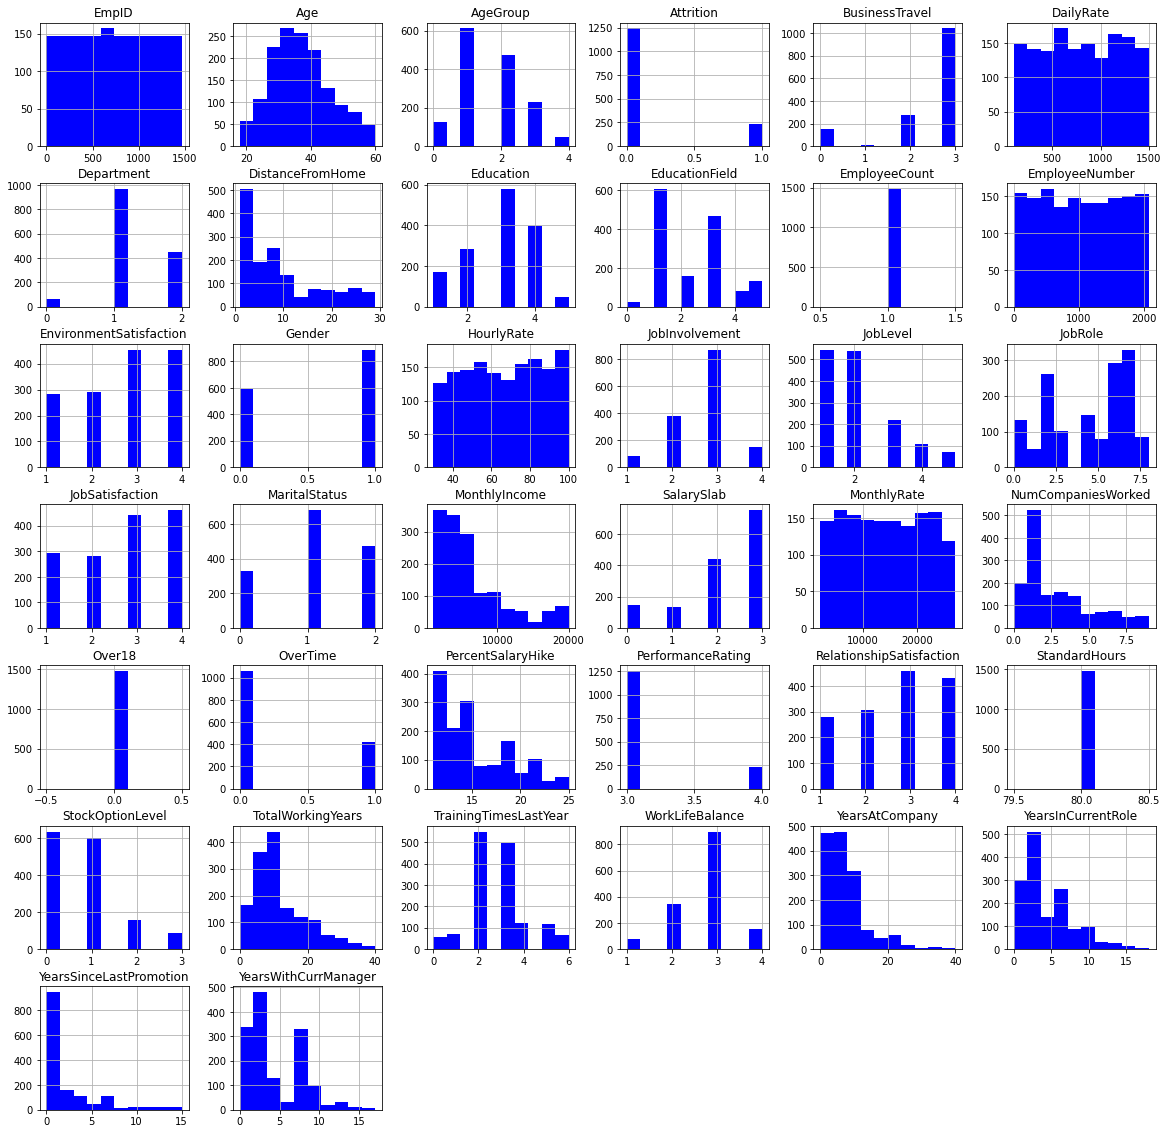

In [8]:
# Visualize histogram of each attribute
data.hist(figsize=(20, 20), color='blue')
plt.show()

In [9]:
# Attrition is the target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Training a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Make predictions
rf_y_pred = rf_model.predict(X_test)

RandomForest Classifier Results:
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       249
           1       1.00      0.15      0.26        47

    accuracy                           0.86       296
   macro avg       0.93      0.57      0.59       296
weighted avg       0.88      0.86      0.82       296



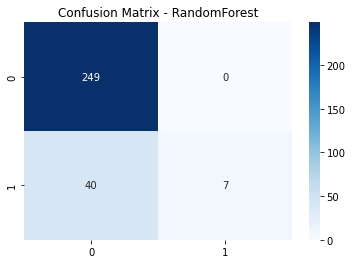

In [13]:
# Evaluate the RandomForest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("RandomForest Classifier Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, rf_y_pred))
conf_matrix_rf = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - RandomForest')
plt.show()

In [14]:
# Training an XGBClassifier model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [15]:
# Make predictions
xgb_y_pred = xgb_model.predict(X_test)


XGBoost Classifier Results:
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       249
           1       0.62      0.34      0.44        47

    accuracy                           0.86       296
   macro avg       0.75      0.65      0.68       296
weighted avg       0.84      0.86      0.84       296



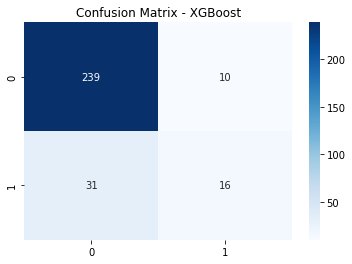

In [16]:
# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("\nXGBoost Classifier Results:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(classification_report(y_test, xgb_y_pred))
conf_matrix_xgb = confusion_matrix(y_test, xgb_y_pred)
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [17]:
# Feature importance for RandomForest
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print("RandomForest Feature Importance:")
print(feature_importance_rf)

RandomForest Feature Importance:
                     Feature  Importance
19             MonthlyIncome    0.065280
24                  OverTime    0.057653
1                        Age    0.050607
10            EmployeeNumber    0.050294
4                  DailyRate    0.046826
0                      EmpID    0.044669
13                HourlyRate    0.044133
21               MonthlyRate    0.042199
33            YearsAtCompany    0.042001
6           DistanceFromHome    0.041438
30         TotalWorkingYears    0.040543
36      YearsWithCurrManager    0.032107
22        NumCompaniesWorked    0.030570
25         PercentSalaryHike    0.030187
16                   JobRole    0.028927
11   EnvironmentSatisfaction    0.025283
17           JobSatisfaction    0.024920
14            JobInvolvement    0.024860
18             MaritalStatus    0.023742
32           WorkLifeBalance    0.023515
29          StockOptionLevel    0.022964
34        YearsInCurrentRole    0.022666
31     TrainingTimesLast

In [18]:
# Feature importance for XGBoost
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)
print("\nXGBoost Feature Importance:")
print(feature_importance_xgb)


XGBoost Feature Importance:
                     Feature  Importance
15                  JobLevel    0.172265
24                  OverTime    0.065423
18             MaritalStatus    0.042593
14            JobInvolvement    0.038963
34        YearsInCurrentRole    0.036997
16                   JobRole    0.034450
29          StockOptionLevel    0.033506
35   YearsSinceLastPromotion    0.031728
33            YearsAtCompany    0.031479
17           JobSatisfaction    0.031326
32           WorkLifeBalance    0.030586
36      YearsWithCurrManager    0.029250
1                        Age    0.028573
19             MonthlyIncome    0.026646
11   EnvironmentSatisfaction    0.025875
30         TotalWorkingYears    0.025668
5                 Department    0.025520
22        NumCompaniesWorked    0.025474
3             BusinessTravel    0.023818
27  RelationshipSatisfaction    0.023000
8             EducationField    0.022827
6           DistanceFromHome    0.021304
25         PercentSalaryHike

In [19]:
# Compare model performance
model_comparison = pd.DataFrame({
    'Model': ['RandomForest', 'XGBoost'],
    'Accuracy': [rf_accuracy, xgb_accuracy]
})
print("\nModel Comparison:")
print(model_comparison)


Model Comparison:
          Model  Accuracy
0  RandomForest  0.864865
1       XGBoost  0.861486


## Conclusion from RandomForest Feature Importance:

The RandomForest model highlights the following top 5 features as the most influential in predicting employee attrition:

1. Monthly Income (Importance: 0.065):
Employees with higher monthly incomes are less likely to leave. This emphasizes the significance of competitive salary packages in promoting employee retention.

2. Overtime (Importance: 0.058):
The presence of overtime work is a significant factor contributing to attrition. Employees required to work overtime may be more prone to considering leaving, highlighting the importance of workload management.

3. Age (Importance: 0.051):
Age plays a crucial role in attrition, suggesting that younger employees or those at specific career stages may be more inclined to leave. Understanding age-related factors can guide targeted retention strategies.

4. Employee Number (Importance: 0.050):
Employee number, possibly indicating tenure, is influential in attrition. Longer-tenured employees are less likely to leave, emphasizing the importance of fostering loyalty through various retention initiatives.

5. Daily Rate (Importance: 0.047):
The daily rate influences attrition, indicating that dissatisfaction with compensation may contribute to employee turnover. Addressing compensation concerns can be crucial for improving retention.

The RandomForest model highlighted the importance of workload management, career stage, employee tenure, and compensation in retention strategies.

## Conclusion from XGBoost Feature Importance:

The feature importance analysis from the XGBoost model provides crucial insights into the factors influencing employee attrition. Here are the top 5 influential features and their implications:

1. Job Level (Importance: 0.172):
Job level is the most influential factor, suggesting that career progression plays a critical role in employee retention. This underscores the importance of providing growth opportunities for employees.

2. Overtime (Importance: 0.065):
Similar to RandomForest, overtime remains a significant factor. Employees required to work overtime are more prone to attrition, emphasizing the need for effective workload management strategies.

3. Marital Status (Importance: 0.043):
Marital status is moderately influential. Understanding the impact of marital status on attrition can guide the design of benefits and policies supporting employees with varying family structures.

4. Job Involvement (Importance: 0.039):
Job involvement is a significant contributor, indicating that engaged employees are less likely to leave. Tailoring retention initiatives based on job involvement can enhance overall job satisfaction.

5. Years in Current Role (Importance: 0.037):
The time spent in the current role is an important consideration, suggesting that longer-tenured employees in their current roles are less likely to leave. Strategies focusing on role satisfaction and progression can positively impact retention.

The XGBoost model underscores the importance of career development, work-life balance, and individual factors such as marital status and job involvement in predicting employee attrition. 

#### Both models highlight the importance of addressing compensation concerns, fostering loyalty, and tailoring retention initiatives based on employee demographics, job roles, and satisfaction metrics.